In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map( \
        {0:iris.target_names[0], \
        1:iris.target_names[1], \
        2:iris.target_names[2]} )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:

target = df.target.values
target = np.array(target)

df = df.rename(columns = \
               { 'sepal length (cm)': 'sl',
                'sepal width (cm)': 'sw',
                'petal length (cm)': 'pl',
                'petal width (cm)': 'pw'})

sl = df.sl.values
sw = df.sw.values
pl = df.pl.values
pw = df.pw.values

x = np.vstack((sl,sw,pl,pw)).T

(x_train, x_test, y_train, y_test) = train_test_split(x, target, test_size=0.7)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

mlp = MLPClassifier(max_iter = 300, solver='adam', random_state=1)
mlp.fit(x_train, y_train)

print("Percent of accuracy on training data is ", 100 * mlp.score(x_train, y_train))

Percent of accuracy on training data is  95.55555555555556


/Users/sebastianblanco/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
predictions = mlp.predict(x_test)
print("Percent of accuracy on test data is ", 100 * mlp.score(x_test, y_test))

Percent of accuracy on test data is  96.19047619047619


In [24]:
scaler.fit(x)
x = scaler.transform(x)

print("Percent of accuracy on entire dataset is ", 100 * mlp.score(x, target))

Percent of accuracy on entire dataset is  96.66666666666667


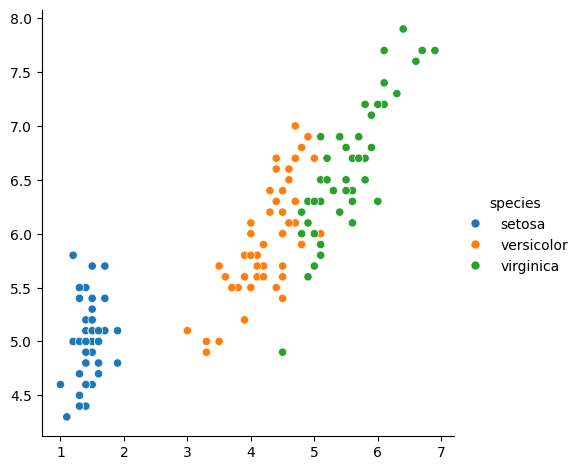

In [25]:
length = sns.relplot(x=pl, y=sl, hue = df.species)

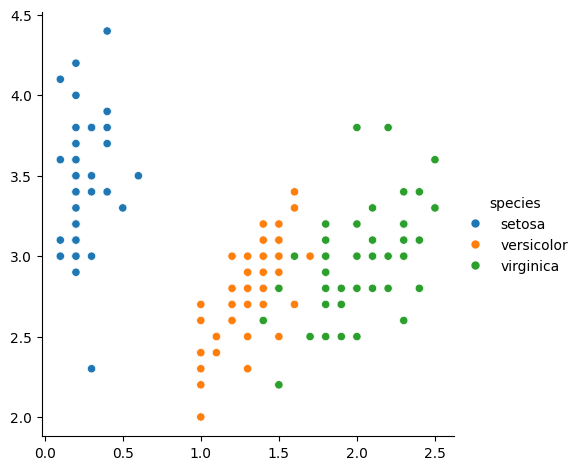

In [26]:
width = sns.relplot(x=pw, y=sw, hue=df.species)

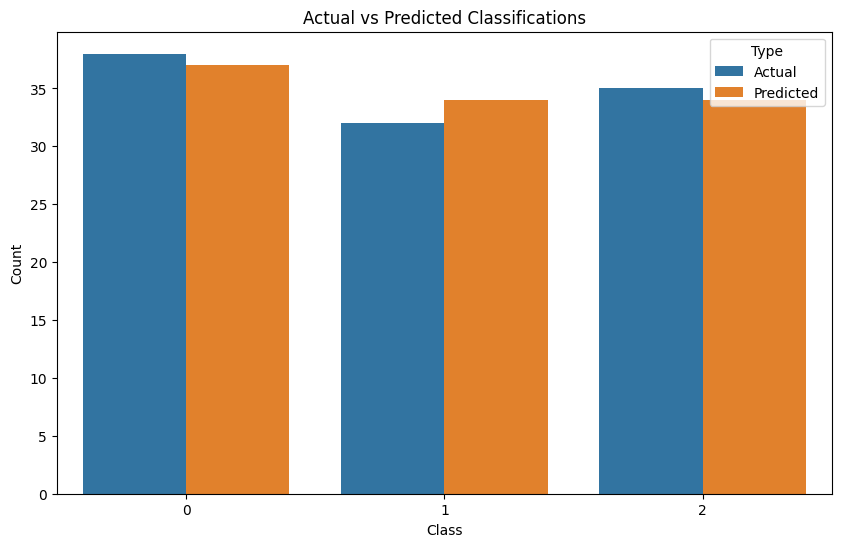

In [27]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

comparison_df = comparison_df.melt(var_name='Type', value_name='Class')

plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df, x='Class', hue='Type')
plt.title('Actual vs Predicted Classifications')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()